<a href="https://colab.research.google.com/github/micah-shull/AI_Agents/blob/main/016_Feedback_Agent_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 📝 Sentiment & Summary Feedback Agent (with Category Input)

### 🎯 Objective

This notebook demonstrates a practical AI agent that processes **retail employee feedback** by:

* 🧠 **Summarizing** the core idea of the feedback
* 😊 **Analyzing sentiment** (Positive, Neutral, Negative)
* 🏷️ Relying on **user-selected categories** for accurate and consistent grouping

The goal is to create a foundation for **manager-facing insights** that improve operational decision-making and morale visibility.

---

### 🧱 Key Agent Tasks

For each employee feedback entry, the AI agent will:

1. Summarize the employee’s comment in a clear, concise sentence.
2. Classify the emotional **sentiment** of the feedback.
3. Retain the **user-selected category and department** for organization and reporting.

---

### ⚙️ Workflow

| Step                     | Description                                                                             |
| ------------------------ | --------------------------------------------------------------------------------------- |
| 1. Input Simulation      | Employees select `department` and `category` from dropdowns and submit written feedback |
| 2. LLM Agent             | Summarizes the feedback and assigns a sentiment label                                   |
| 3. DataFrame Output      | Stores structured results (`department`, `category`, `summary`, `sentiment`)            |
| 4. Visualization/Reports | Enables charting trends or drafting reports from clean, structured data                 |

---

### 🎯 Optimization Strategy: Why We Use Dropdowns

By requiring employees to select `department` and `category`, we:

* ✅ Avoid ambiguous or redundant category labels from the model
* ✅ Improve consistency across entries
* ✅ Allow LLM to focus fully on **summary + sentiment**, boosting precision
* ✅ Enable easier analytics, sorting, and grouping later
* ✅ Future-proof the system (category list can grow via management input)

---

### 🧪 Benefits of This Setup

| Feature             | Benefit                                                  |
| ------------------- | -------------------------------------------------------- |
| Modular functions   | Easy to swap or upgrade models later                     |
| Clean structure     | Compatible with dashboards, reports, or weekly summaries |
| Grounded categories | Reliable grouping for decision-making                    |
| Enhanced LLM focus  | More accurate, low-cost model use (e.g., `gpt-4o-mini`)  |

### 🌍 Why This Prototype Has Broad Value:

* **Universally applicable**: Any org with employee feedback needs can use it.
* **Low barrier to entry**: Doesn’t require complex infrastructure — just a form and a model.
* **Actionable insights**: Management gets a clear, structured view of what’s working and what’s broken.
* **Scalable**: Add features like email reports, dashboards, Slack bots, or multi-lingual support down the line.





##Pip Installs

In [1]:
!pip install -q transformers accelerate huggingface_hub litellm python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.1 MB/s eta 0:00:00


## Feedback Samples

In [30]:
import json

# Sample feedback data
feedback_data = [
    # GM: Merchandising
    {
        "department": "GM",
        "category": "store organization",
        "employee_feedback": "The shelves in aisle 12 are constantly messy because customers leave things everywhere and we don’t have time to fix it between tasks."
    },
    {
        "department": "GM",
        "category": "equipment issues",
        "employee_feedback": "Our pricing gun breaks down frequently. It slows down the whole price change process."
    },
    {
        "department": "GM",
        "category": "cart availability",
        "employee_feedback": "We never have enough shopping carts near the entrance during busy hours."
    },
    {
        "department": "GM",
        "category": "planogram accuracy",
        "employee_feedback": "The planogram we receive doesn’t match the actual product layout — makes resets take longer."
    },
    {
        "department": "GM",
        "category": "staffing",
        "employee_feedback": "Too many tasks assigned during a single shift. We need more hands during truck unload days."
    },
    {
        "department": "GM",
        "category": "manager support",
        "employee_feedback": "Our team lead always helps during busy times — really makes a difference."
    },
    {
        "department": "GM",
        "category": "cleanliness",
        "employee_feedback": "Endcaps stayed organized this week and we finished the reset early."
    },

    # OOF: Online Order Fulfillment
    {
        "department": "OOF",
        "category": "pick time issues",
        "employee_feedback": "Pick times are too short for some items that are far apart — leads to constant rushing."
    },
    {
        "department": "OOF",
        "category": "inventory management",
        "employee_feedback": "Sometimes online orders include out-of-stock items — makes us look bad and causes delays."
    },
    {
        "department": "OOF",
        "category": "equipment issues",
        "employee_feedback": "The handheld scanner freezes mid-pick and we have to restart it almost daily."
    },
    {
        "department": "OOF",
        "category": "communication",
        "employee_feedback": "We aren’t told when substitutes are approved — we waste time checking back."
    },
    {
        "department": "OOF",
        "category": "staging space",
        "employee_feedback": "There’s not enough space in the staging area when online orders pile up during weekends."
    },
    {
        "department": "OOF",
        "category": "item returns",
        "employee_feedback": "Returns are straightforward now that the barcode scanner update rolled out."
    },
    {
        "department": "OOF",
        "category": "workflow clarity",
        "employee_feedback": "The new pick route system is faster and easier to follow — a big improvement!"
    },
    {
        "department": "OOF",
        "category": "equipment issues",
        "employee_feedback": "The scanner crashes a lot — restarting it wastes at least 10 minutes each time."
    }
]


# Save to JSON
with open("sample_feedback.json", "w") as f:
    json.dump(feedback_data, f, indent=2)

print("✅ Sample feedback saved to sample_feedback.json")


✅ Sample feedback saved to sample_feedback.json


## Load API Key

In [31]:
import json
import os
from openai import OpenAI
from dotenv import load_dotenv
import pandas as pd

# Load environment variables from a .env file
load_dotenv("/content/API_KEYS.env", override=True)

# Grab API key
api_key = os.getenv("OPENAI_API_KEY")

if not api_key:
    raise ValueError("❌ OPENAI_API_KEY not found in environment. Make sure your .env file is loaded correctly.")

# Set up OpenAI client
client = OpenAI(api_key=api_key)

# Load sample feedback
with open("sample_feedback.json", "r") as f:
    feedback_list = json.load(f)

print(f"✅ Loaded {len(feedback_list)} feedback entries")

✅ Loaded 15 feedback entries


## Feedback Function

In [36]:
def analyze_feedback(feedback_text, department, category):
    system_prompt = f"""
You are an assistant that helps summarize and score the sentiment of employee feedback from a retail store.

The employee works in the '{department}' department.

For each piece of feedback, do the following:
1. Summarize the message in one clear sentence.
2. Classify the sentiment as one of: "Positive", "Neutral", or "Negative".

Use this format:
{{
  "summary": "...",
  "sentiment": "Positive | Neutral | Negative"
}}

Here are some examples:

---

Employee: "The handheld scanner freezes mid-pick and we have to restart it almost daily."
Output:
{{
  "summary": "Scanners freeze frequently, causing workflow delays.",
  "sentiment": "Negative"
}}

---

Employee: "The new cart system works really well — customers don’t have to wait for carts anymore."
Output:
{{
  "summary": "Cart availability has improved and customer experience is better.",
  "sentiment": "Positive"
}}

---

Employee: "Sometimes the planogram doesn’t match the shelf layout, which slows us down."
Output:
{{
  "summary": "Mismatch between planogram and shelves causes delays.",
  "sentiment": "Neutral"
}}

---

Now analyze this feedback:
"""

    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": feedback_text}
    ]

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        temperature=0.3
    )

    reply = response.choices[0].message.content.strip()

    try:
        result = json.loads(reply)
        result["department"] = department
        result["category"] = category  # ✅ Include user-provided category
        return result
    except json.JSONDecodeError:
        print("❌ Failed to parse response:", reply)
        return {
            "summary": "Could not parse",
            "sentiment": "Neutral",
            "department": department,
            "category": category  # ✅ Still include it even on fallback
        }




## Process All Feedback and Store Results





In [37]:
results = []

for entry in feedback_list:
    dept = entry["department"]
    cat  = entry["category"]          # ⬅️ grab category from the entry
    text = entry["employee_feedback"]

    print(f"🔍 Processing ({dept} / {cat}): {text}")
    result = analyze_feedback(text, dept, cat)   # ⬅️ now pass all 3 args

    results.append({
        "department": dept,
        "category":   cat,
        "original_feedback": text,
        "summary":    result["summary"],
        "sentiment":  result["sentiment"]
    })

df = pd.DataFrame(results)


🔍 Processing (GM / store organization): The shelves in aisle 12 are constantly messy because customers leave things everywhere and we don’t have time to fix it between tasks.
🔍 Processing (GM / equipment issues): Our pricing gun breaks down frequently. It slows down the whole price change process.
🔍 Processing (GM / cart availability): We never have enough shopping carts near the entrance during busy hours.
🔍 Processing (GM / planogram accuracy): The planogram we receive doesn’t match the actual product layout — makes resets take longer.
🔍 Processing (GM / staffing): Too many tasks assigned during a single shift. We need more hands during truck unload days.
🔍 Processing (GM / manager support): Our team lead always helps during busy times — really makes a difference.
🔍 Processing (GM / cleanliness): Endcaps stayed organized this week and we finished the reset early.
🔍 Processing (OOF / pick time issues): Pick times are too short for some items that are far apart — leads to constant rush

## Review Sentiment Results

In [38]:
# Loop through each sentiment category
for sentiment_level in ["Positive", "Neutral", "Negative"]:
    print(f"\n🔎 Showing all {sentiment_level} feedback\n" + "=" * 50)

    sentiment_df = df[df["sentiment"] == sentiment_level]

    for i, row in sentiment_df.iterrows():
        print(f"🟡 Sentiment: {sentiment_level}")
        print(f"📝 Original: {row['original_feedback']}")
        print(f"🧠 Summary : {row['summary']}")
        print(f"🏷️ Category: {row['category']}")
        print(f"🏬 Department: {row['department']}")
        print("-" * 60)


🔎 Showing all Positive feedback
🟡 Sentiment: Positive
📝 Original: Our team lead always helps during busy times — really makes a difference.
🧠 Summary : The team lead provides valuable support during busy periods.
🏷️ Category: manager support
🏬 Department: GM
------------------------------------------------------------
🟡 Sentiment: Positive
📝 Original: Endcaps stayed organized this week and we finished the reset early.
🧠 Summary : Endcaps were well-organized and the reset was completed ahead of schedule.
🏷️ Category: cleanliness
🏬 Department: GM
------------------------------------------------------------
🟡 Sentiment: Positive
📝 Original: Returns are straightforward now that the barcode scanner update rolled out.
🧠 Summary : The barcode scanner update has made the returns process easier.
🏷️ Category: item returns
🏬 Department: OOF
------------------------------------------------------------
🟡 Sentiment: Positive
📝 Original: The new pick route system is faster and easier to follow — a b

## Review Results

---

### ✅ **Positive Feedback**

| Feedback               | Summary Quality              | Sentiment Accuracy |
| ---------------------- | ---------------------------- | ------------------ |
| Team lead support      | Excellent: clear and concise | ✅ Correct          |
| Endcaps reset early    | Excellent                    | ✅ Correct          |
| Barcode scanner update | Excellent                    | ✅ Correct          |
| Pick route system      | Excellent                    | ✅ Correct          |

All **positive entries** are consistent, with clean summaries and accurate sentiment labels. 👍

---

### 🟡 **Neutral Feedback**

| Feedback           | Summary            | Sentiment                |
| ------------------ | ------------------ | ------------------------ |
| Planogram mismatch | ✅ Matches original | ✅ Neutral is appropriate |

Since this type of comment expresses a mild inconvenience without emotional intensity, “Neutral” is an ideal label.

---

### 🔻 **Negative Feedback**

These are all spot on — here's a few observations:

* **Store organization, pricing gun, and cart issues** → Clear operational complaints.
* **Staffing and pick time pressure** → Strong internal friction = justified “Negative”.
* **Scanner crashes & staging area** → High-effort pain points well-summarized.
* **Communication & out-of-stock items** → Affect both employees and customers, so again “Negative” fits.

💡 **Minor suggestion**:
The system is tagging **multiple scanner issues** under `"equipment issues"` — which is good normalization. If needed later, we could break these down into `"scanner"` vs. `"pricing gun"` or keep them merged for simplicity.

---

### ✅ Conclusion

* Sentiment classification is **accurate and consistent**.
* Summaries are **succinct and faithful** to original input.
* Categories are now **structured**, making dashboarding easy.
* This setup is **ready for real-world testing or integration**.






## 🧱 Goal

> **Build a simple dashboard** that shows counts of feedback **sentiment** by **department** and **category**, then automatically sends a summary email to the right manager.

---

## 🧠 Where to Use Traditional Code vs LLM Agents

| Task                                   | Tool                                                | Why                                                                             |
| -------------------------------------- | --------------------------------------------------- | ------------------------------------------------------------------------------- |
| 📊 **Create dashboard visualizations** | Python (e.g., `matplotlib`, `seaborn`, or `Plotly`) | These are structured, deterministic tasks — a script is faster and more stable. |
| 🧠 **Summarize the feedback**          | LLM agent (e.g., `summarize_by_department()`)       | Natural language generation benefits from LLMs                                  |
| 📨 **Write and send manager emails**   | LLM for text + script for email send                | Email tone/structure via LLM, SMTP/email API for delivery                       |
| 👤 **Determine who to email**          | LLM (optional) or rule-based                        | If logic is simple (e.g., based on `department`), a rule is better              |

---

## ✅ Suggested Dashboard Plan (MVP)

### 1. **Prepare the Data**

Group your results by department and category:

```python
summary_table = df.groupby(["department", "category", "sentiment"]).size().unstack(fill_value=0)
```

### 2. **Plot the Results**

Create a bar plot showing sentiment breakdown:

```python
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="category", hue="sentiment", palette="Set2")
plt.title("Sentiment by Category")
plt.xlabel("Number of Feedback Entries")
plt.ylabel("Category")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()
```

Or plot by department + sentiment.

---

### 3. **Email Logic (Optional Agent)**

Have a dictionary of department → email:

```python
manager_emails = {
    "GM": "gm_manager@company.com",
    "OOF": "oof_manager@company.com"
}
```

Let an LLM agent like `draft_manager_email()` generate a message for each, using filtered data.

---

## 🤖 Could an LLM Build the Dashboard?

In theory — yes. But in practice:

* Visualizations need precision and styling
* LLMs can describe or generate *Python code* for dashboards, but they don’t replace tools like Seaborn or Plotly directly
* They're better at *explaining*, *generating code*, or *describing insights* than rendering graphics

---

## 🧠 Summary

* Build the dashboard visually using **code**
* Use the **agent** to generate insight and personalized messaging
* Eventually, you can plug this into a Streamlit app or report




In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# 1) Grouped pivot table (optional)
# -------------------------------
summary_table = (
    df.groupby(["department", "category", "sentiment"])
      .size()
      .unstack(fill_value=0)
      .sort_index()
)
display(summary_table)

sentiment                        Negative  Neutral  Positive
department category                                         
GM         cart availability            1        0         0
           cleanliness                  0        0         1
           equipment issues             1        0         0
           manager support              0        0         1
           planogram accuracy           0        1         0
           staffing                     1        0         0
           store organization           1        0         0
OOF        communication                1        0         0
           equipment issues             2        0         0
           inventory management         1        0         0
           item returns                 0        0         1
           pick time issues             1        0         0
           staging space                1        0         0
           workflow clarity             0        0         1

### PLOT - Sentiment by Category

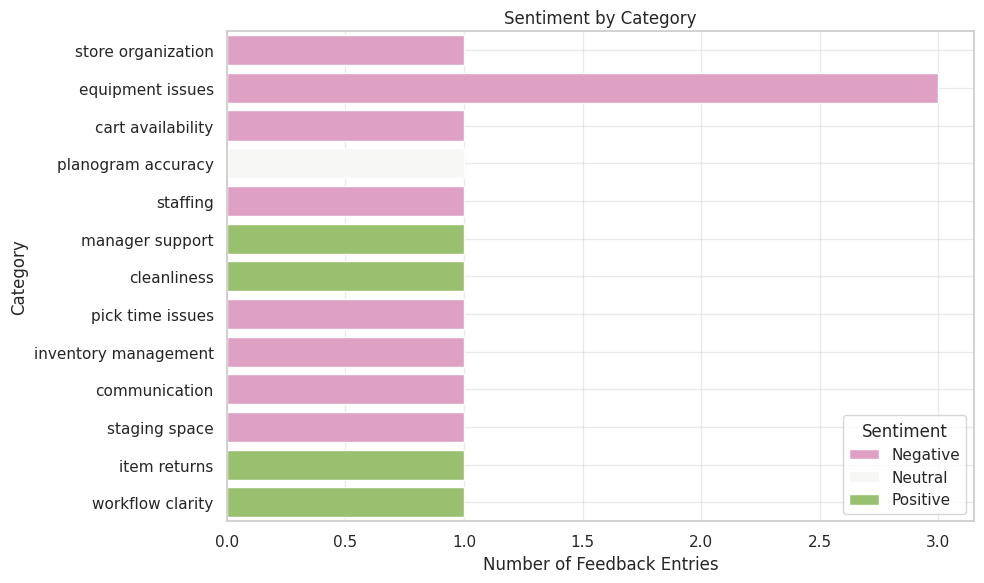

In [66]:
sns.set(style="whitegrid", context='notebook', palette="PiYG")

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y="category", hue="sentiment", palette="PiYG")
plt.title("Sentiment by Category")
plt.xlabel("Number of Feedback Entries")
plt.ylabel("Category")
plt.legend(title="Sentiment")
plt.grid(alpha=0.4)  # 👈 sets gridline transparency
plt.tight_layout()
plt.tight_layout()
plt.show()

### PLOT - Sentiment by Department

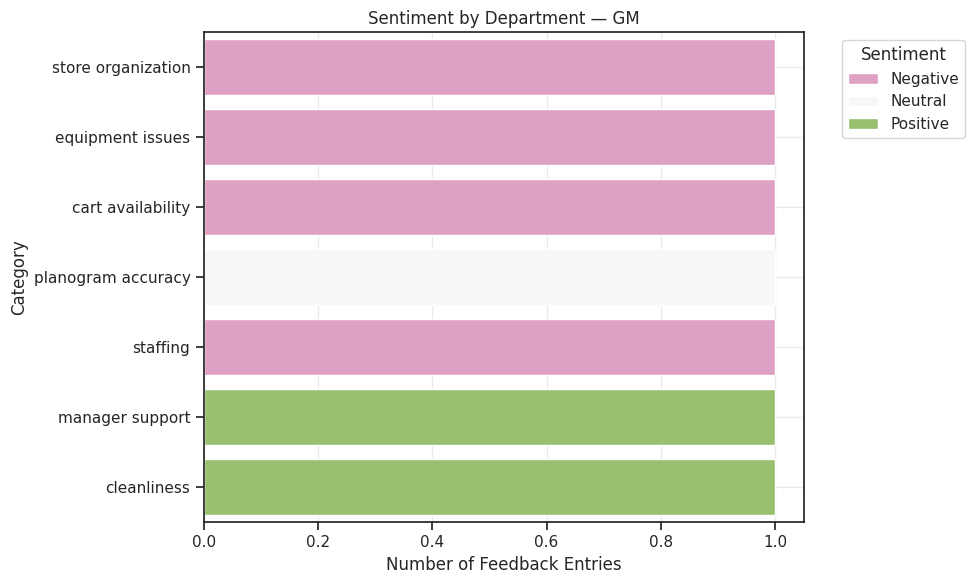

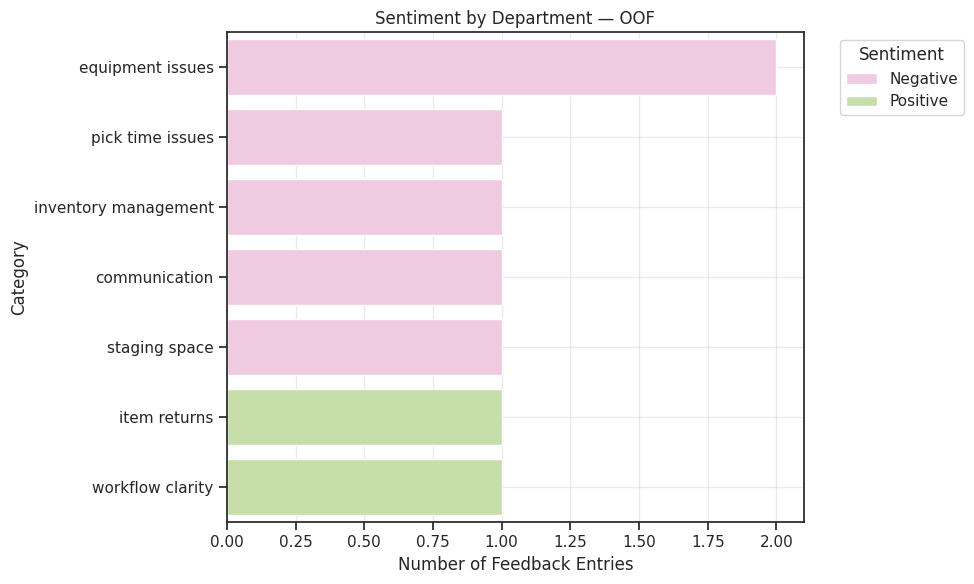

In [67]:
# -------------------------------
# 2) Bar plots – one per department
# -------------------------------

sns.set(style="ticks", context='notebook', palette="PiYG")

for dept in df["department"].unique():
    dept_df = df[df["department"] == dept]

    plt.figure(figsize=(10, 6))
    sns.countplot(
        data=dept_df,
        y="category",
        hue="sentiment", palette="PiYG",
        order=dept_df["category"].value_counts().index,  # most‐mentioned at top
    )
    plt.title(f"Sentiment by Department — {dept}")
    plt.xlabel("Number of Feedback Entries")
    plt.ylabel("Category")
    plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1.0), loc="best")
    plt.grid(alpha=0.4)  # 👈 sets gridline transparency
    plt.tight_layout()
    plt.show()



### 🤖 What an Agent Can Do Next (Based on This Data)

### What You Already Have

* **Structured feedback** with: `department`, `category`, `sentiment`, and `summary`
* **Aggregated data** grouped by key dimensions
* **Visual plots** of sentiment by category and department

---

#### 1. **Insight Agent** (Summarize the State of Each Department)

* **Input**: Aggregated feedback by department
* **Agent Task**: For each department:

  * Summarize key issues
  * Highlight sentiment trends
  * Suggest areas of concern or praise

Example output:

> "GM department has high negative sentiment around 'planogram issues' and 'cart availability'. Positive sentiment is low overall."

➡️ **Purpose**: Gives managers a quick human-readable summary from the data.

---

#### 2. **Escalation Agent** (Detect Issues to Flag)

* **Input**: Aggregated counts
* **Agent Logic**:

  * If negative feedback for a category > threshold (e.g., 2+), flag it.
  * If a department has no positive feedback, alert.
* **Agent Output**: A list of flagged issues with brief explanations.

➡️ **Purpose**: Helps management focus on what needs action *now*.

---

#### 3. **Email Agent** (Send Tailored Messages)

* **Input**: Department-level summaries or flags
* **Agent Output**: Email drafts addressed to the right person
* **Bonus**: Use rules or LLM to determine *who* to send to based on department.

➡️ **Purpose**: Automates communication workflows.

---

#### 4. **Planner Agent** (Decide What Actions to Take)

This is higher-level:

* You give it the aggregated table.
* It decides:

  * “Which department needs review?”
  * “Which report to generate?”
  * “Should we draft a communication or not?”

➡️ **Purpose**: Delegates analysis flow — like a junior analyst deciding what needs attention.

---

### 🛠 Recommended Next Move

Let's build the **Insight Agent** first:

* It’s straightforward.
* Makes your data more valuable.
* Easily expandable into other agents.






### 🧠 Insight Agent – Goal

For each department, the agent will:

1. **Summarize employee feedback themes** by category
2. **Highlight sentiment distribution** (e.g., mostly negative in X, mostly positive in Y)
3. **Flag categories with high concern** (e.g., if negative sentiment is dominant)
4. **Provide a 2–3 sentence summary** a manager can quickly review



In [68]:
def department_insight_agent(department, department_df):
    """
    Summarize key insights for a specific department based on categorized and sentiment-tagged feedback.
    """

    system_prompt = f"""
You are a workplace assistant generating a weekly feedback summary for the '{department}' department.

Summarize:
1. What are the employees saying, and which categories are mentioned most?
2. What is the overall sentiment trend (positive, neutral, or negative)?
3. Flag any areas of concern (e.g., repeated issues or negative sentiment).

Your output must be a short summary in this JSON format:
{{
  "department": "{department}",
  "summary": "...",
  "notable_categories": ["..."],
  "overall_sentiment": "Positive | Neutral | Negative"
}}
"""

    # Prepare the feedback strings
    combined_feedback = "\n".join(
        f"- ({row['category']}, {row['sentiment']}) {row['summary']}"
        for _, row in department_df.iterrows()
    )

    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": f"Here is the feedback for this department:\n\n{combined_feedback}"}
    ]

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        temperature=0.3
    )

    reply = response.choices[0].message.content.strip()

    try:
        return json.loads(reply)
    except json.JSONDecodeError:
        print(f"❌ Could not parse response for department: {department}")
        return {
            "department": department,
            "summary": "Could not generate insight.",
            "notable_categories": [],
            "overall_sentiment": "Neutral"
        }


In [69]:
department_reports = []

for dept in df["department"].unique():
    dept_df = df[df["department"] == dept]
    print(f"\n📊 Generating summary for department: {dept}")
    report = department_insight_agent(dept, dept_df)
    department_reports.append(report)

# Preview results
import pandas as pd
insight_df = pd.DataFrame(department_reports)
insight_df



📊 Generating summary for department: GM

📊 Generating summary for department: OOF


,department,summary,notable_categories,overall_sentiment
0,GM,Employees have expressed concerns regarding st...,"[store organization, equipment issues, cart av...",Negative
1,OOF,Employees have expressed concerns primarily ab...,"[pick time issues, inventory management, equip...",Negative



🏬 Department: GM
📝 Summary: Employees have expressed concerns regarding store organization, equipment issues, and staffing challenges, while also noting positive support from management and cleanliness in certain areas.
📌 Notable Categories: store organization, equipment issues, cart availability, staffing, manager support, cleanliness
📊 Overall Sentiment: Negative
------------------------------------------------------------

🏬 Department: OOF
📝 Summary: Employees have expressed concerns primarily about time management, inventory issues, equipment reliability, and communication gaps. However, there are positive notes regarding the returns process and workflow improvements.
📌 Notable Categories: pick time issues, inventory management, equipment issues, communication, staging space, item returns, workflow clarity
📊 Overall Sentiment: Negative
------------------------------------------------------------


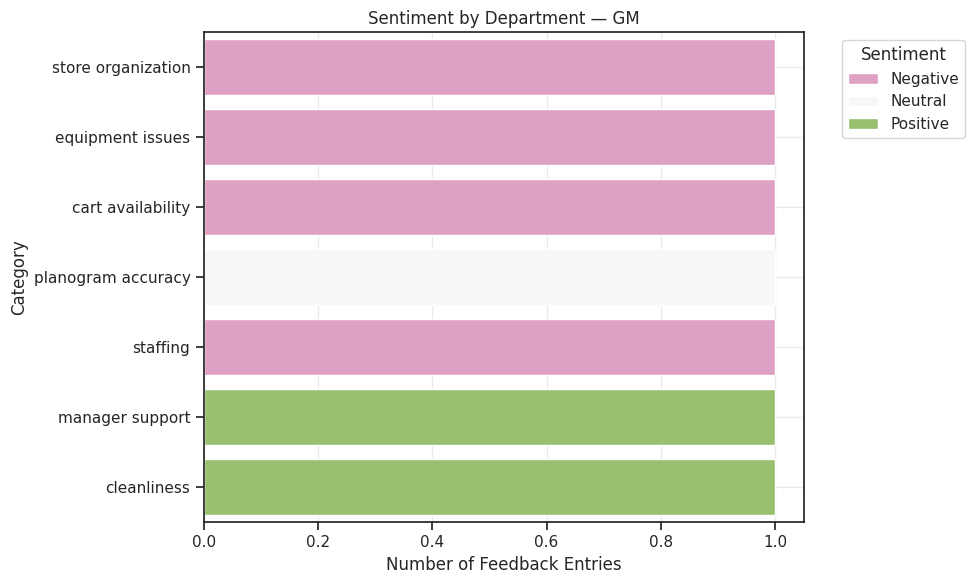

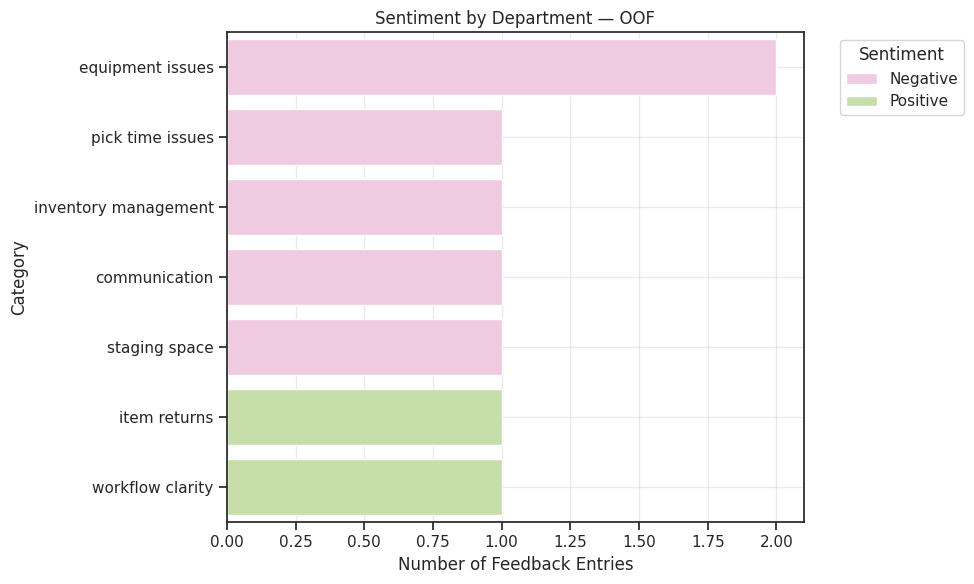

In [73]:
for _, row in insight_df.iterrows():
    print(f"\n🏬 Department: {row['department']}")
    print(f"📝 Summary: {row['summary']}")
    print(f"📌 Notable Categories: {', '.join(row['notable_categories'])}")
    print(f"📊 Overall Sentiment: {row['overall_sentiment']}")
    print("-" * 60)

for dept in df["department"].unique():
    dept_df = df[df["department"] == dept]

    plt.figure(figsize=(10, 6))
    sns.countplot(
        data=dept_df,
        y="category",
        hue="sentiment", palette="PiYG",
        order=dept_df["category"].value_counts().index,  # most‐mentioned at top
    )
    plt.title(f"Sentiment by Department — {dept}")
    plt.xlabel("Number of Feedback Entries")
    plt.ylabel("Category")
    plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1.0), loc="best")
    plt.grid(alpha=0.4)  # 👈 sets gridline transparency
    plt.tight_layout()
    plt.show()



## 🔄 Summary of Changes: Improving Balance in Feedback Summaries

### 🎯 **What Are We Changing?**

We are updating the **Insight Agent's summarization logic** to:

* Highlight the **top 1–2 concerns** most frequently mentioned by employees (typically with negative sentiment).
* Acknowledge any **positive trends or standout strengths**, if present.
* Produce a **more balanced summary** for each department that reflects the full range of employee sentiment.

---

### 🤔 **Why Are We Making These Changes?**

During initial testing, we observed that summaries were:

* **Overwhelmingly negative**, even when positive feedback existed.
* Focused entirely on **problems**, which can demoralize recipients and misrepresent team morale.

This was due to:

* Category frequency being skewed toward negative topics.
* The LLM not being instructed to consider **positive signals** as part of its response.

---

### ✅ **What We Hope to Achieve**

By revising the prompt and logic, we aim to:

* Provide **nuanced insight** that includes both **pain points** and **positives**.
* Help department heads **see progress**, not just problems.
* Support **constructive decision-making** with a more complete emotional picture of the team.

This approach better aligns with how managers make informed choices: not just reacting to complaints, but also reinforcing what's working well.




📊 Generating summary for department: GM

📊 Generating summary for department: OOF

🏬 Department: GM
📝 Summary: Employees have raised several concerns regarding store organization, equipment issues, and staffing challenges. However, there are positive remarks about manager support and cleanliness.
📌 Notable Categories: store organization, equipment issues, manager support
📊 Overall Sentiment: Negative
------------------------------------------------------------

🏬 Department: OOF
📝 Summary: The feedback highlights several critical issues affecting workflow efficiency, particularly around pick times, inventory management, and equipment reliability. However, there are positive trends noted in the returns process and workflow clarity.
📌 Notable Categories: pick time issues, inventory management, item returns
📊 Overall Sentiment: Negative
------------------------------------------------------------


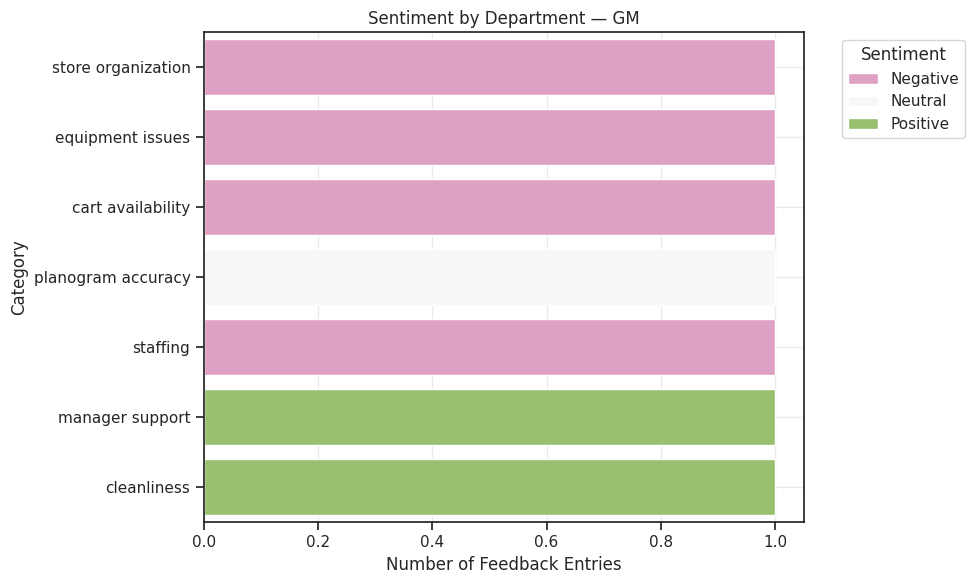

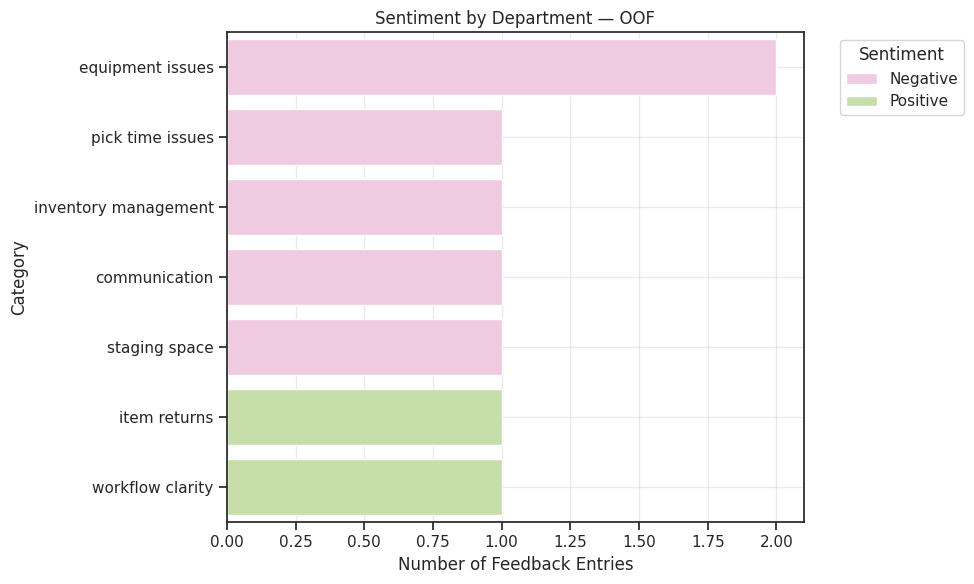

In [75]:
def department_insight_agent(department, department_df):
    """
    Summarize key insights for a specific department based on categorized and sentiment-tagged feedback.
    """

    system_prompt = f"""
You are a workplace assistant generating a weekly feedback summary for the '{department}' department.

Summarize:
1. What are the employees saying, and which categories are mentioned most?
2. What is the overall sentiment trend (positive, neutral, or negative)?
3. Focus on the most commonly mentioned **issues**, especially those with negative sentiment.
4. If there is **positive sentiment** in at least one category, mention it to show balance.
5. Make the tone constructive and focused on improvement.
6. Flag any areas of concern (e.g., repeated issues or negative sentiment).

Your output must be a short summary in this JSON format:
{{
  "department": "{department}",
  "summary": "Summarize main pain points and note any positive trends",
  "notable_categories": ["top issue", "second issue", "optional positive topic"],
  "overall_sentiment": "Negative | Neutral | Positive"
}}
"""

    # Prepare the feedback strings
    combined_feedback = "\n".join(
        f"- ({row['category']}, {row['sentiment']}) {row['summary']}"
        for _, row in department_df.iterrows()
    )

    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": f"Here is the feedback for this department:\n\n{combined_feedback}"}
    ]

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        temperature=0.3
    )

    reply = response.choices[0].message.content.strip()

    try:
        return json.loads(reply)
    except json.JSONDecodeError:
        print(f"❌ Could not parse response for department: {department}")
        return {
            "department": department,
            "summary": "Could not generate insight.",
            "notable_categories": [],
            "overall_sentiment": "Neutral"
        }

department_reports = []

for dept in df["department"].unique():
    dept_df = df[df["department"] == dept]
    print(f"\n📊 Generating summary for department: {dept}")
    report = department_insight_agent(dept, dept_df)
    department_reports.append(report)

# Preview results
import pandas as pd
insight_df = pd.DataFrame(department_reports)
insight_df

for _, row in insight_df.iterrows():
    print(f"\n🏬 Department: {row['department']}")
    print(f"📝 Summary: {row['summary']}")
    print(f"📌 Notable Categories: {', '.join(row['notable_categories'])}")
    print(f"📊 Overall Sentiment: {row['overall_sentiment']}")
    print("-" * 60)

for dept in df["department"].unique():
    dept_df = df[df["department"] == dept]

    plt.figure(figsize=(10, 6))
    sns.countplot(
        data=dept_df,
        y="category",
        hue="sentiment", palette="PiYG",
        order=dept_df["category"].value_counts().index,  # most‐mentioned at top
    )
    plt.title(f"Sentiment by Department — {dept}")
    plt.xlabel("Number of Feedback Entries")
    plt.ylabel("Category")
    plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1.0), loc="best")
    plt.grid(alpha=0.4)  # 👈 sets gridline transparency
    plt.tight_layout()
    plt.show()

While the updated summaries now reflect both **challenges and strengths**, they’re still quite brief and miss the opportunity to provide **richer insight** for leadership.

Here’s how we can improve the summaries going forward:

---

### ✅ **Proposed Improvements**

1. **Deeper Context**
   Include *why* the issues matter, not just *what* they are.
   Example:
   Instead of:

   > “...equipment issues and staffing challenges.”
   > Use:
   > “...frequent equipment failures and understaffing during peak times are hindering task completion and delaying customer service.”

2. **Quantify When Possible**
   Mention how many or what proportion of comments reference a theme (if available).

3. **Elevate Actionable Positives**
   Don’t just note that something is working — explain how it benefits team flow or morale.

4. **Keep Tone Constructive**
   Use language that encourages action without exaggerating negativity.

---

### 📝 Example: Improved Insight Summary

#### 🏬 Department: GM

**Summary:**
Employees frequently express frustration about disorganized shelves and mismatched planograms, which they say lead to wasted time and disrupted workflows. Several noted that outdated equipment — especially pricing tools — slows down resets and adds stress during high-volume periods. Additionally, limited staffing on unload days contributes to task overload and incomplete shifts.
On a positive note, multiple team members called out supportive managers and improved store cleanliness, suggesting recent efforts in these areas are being noticed and appreciated.

**Notable Categories:**
store organization, equipment issues, staffing, manager support, cleanliness
**Overall Sentiment:**
🟥 Mostly Negative, with a few Positive highlights





📊 Generating summary for department: GM

📊 Generating summary for department: OOF

🏬 Department: GM
📝 Summary: The GM department is currently facing several challenges that are impacting daily operations and employee morale. Key issues include messy aisle organization, frequent equipment breakdowns, and a shortage of shopping carts during peak hours, all of which hinder efficiency and create frustration among staff. However, there are positive aspects as well, such as strong support from the team lead during busy times and successful organization of endcaps, which highlight effective teamwork. Addressing the negative feedback while leveraging the strengths noted can lead to improved conditions for both employees and customers.
📌 Notable Categories: store organization, equipment issues, manager support
📊 Overall Sentiment: Negative
------------------------------------------------------------

🏬 Department: OOF
📝 Summary: This week, the OOF department is facing several challenges, inclu

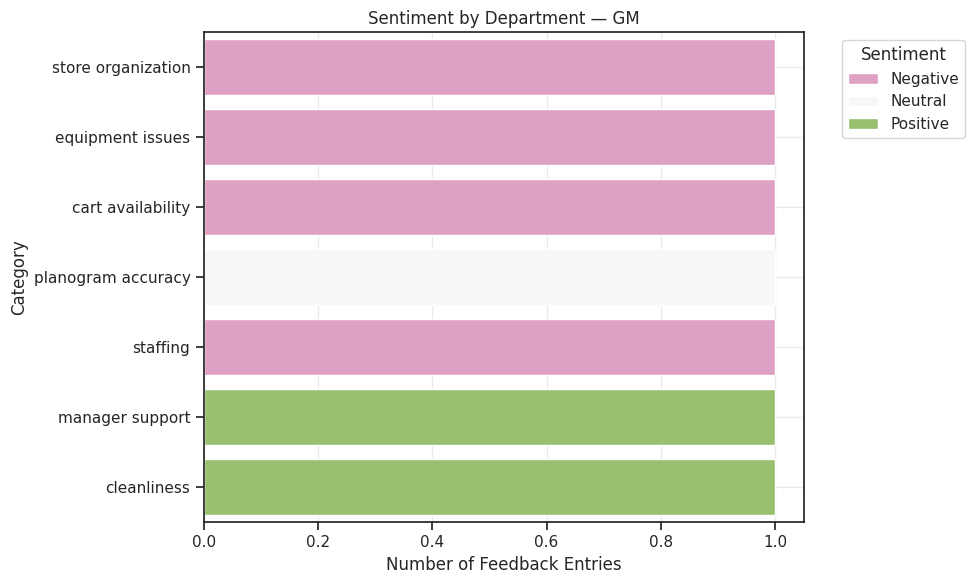

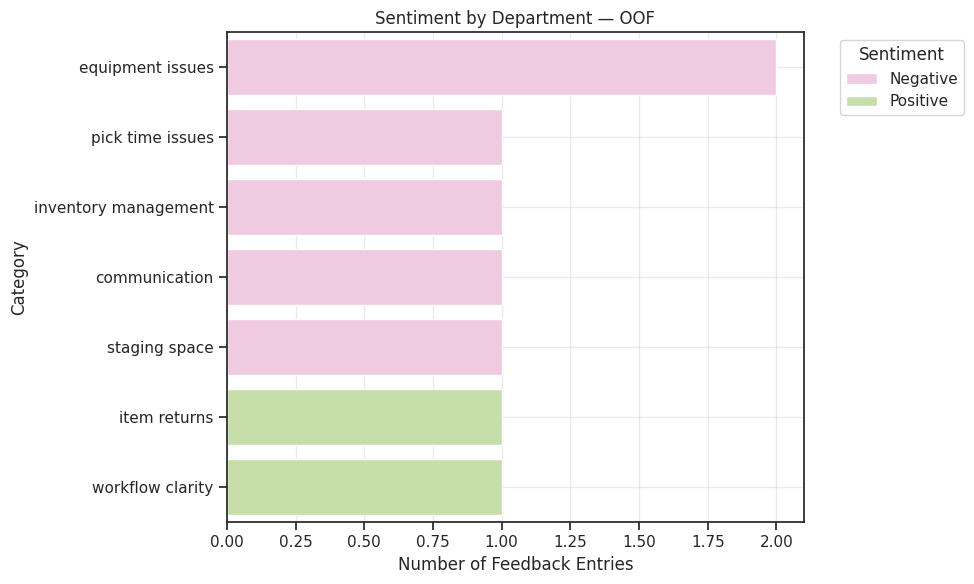

In [76]:
def department_insight_agent(department, department_df):
    """
    Generate a rich, constructive weekly insight summary for the given department using categorized feedback and sentiment.
    """

    system_prompt = f"""
You are a workplace assistant generating a weekly feedback summary for the '{department}' department.

Analyze the categorized and sentiment-tagged feedback provided and write an insightful summary that:
1. Identifies the most common issues and what employees are specifically saying.
2. Explains how these issues are affecting daily work or morale.
3. Mentions categories with positive sentiment and what’s working well.
4. Uses a constructive tone to encourage improvement without being overly negative.
5. Includes both pain points and positive highlights when present.

Output your results strictly in this JSON format:
{{
  "department": "{department}",
  "summary": "Write a 3–5 sentence paragraph summarizing key issues and positive trends, explaining their impact when possible.",
  "notable_categories": ["most common issue", "second most common issue", "optional: most common positive"],
  "overall_sentiment": "Negative | Neutral | Positive"
}}
"""


    # Prepare the feedback strings
    combined_feedback = "\n".join(
        f"- ({row['category']}, {row['sentiment']}) {row['summary']}"
        for _, row in department_df.iterrows()
    )

    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": f"Here is the feedback for this department:\n\n{combined_feedback}"}
    ]

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        temperature=0.7,  # was 0.3 — now more expressive
    )

    reply = response.choices[0].message.content.strip()

    try:
        return json.loads(reply)
    except json.JSONDecodeError:
        print(f"❌ Could not parse response for department: {department}")
        return {
            "department": department,
            "summary": "Could not generate insight.",
            "notable_categories": [],
            "overall_sentiment": "Neutral"
        }

department_reports = []

for dept in df["department"].unique():
    dept_df = df[df["department"] == dept]
    print(f"\n📊 Generating summary for department: {dept}")
    report = department_insight_agent(dept, dept_df)
    department_reports.append(report)

# Preview results
insight_df = pd.DataFrame(department_reports)
insight_df

for _, row in insight_df.iterrows():
    print(f"\n🏬 Department: {row['department']}")
    print(f"📝 Summary: {row['summary']}")
    print(f"📌 Notable Categories: {', '.join(row['notable_categories'])}")
    print(f"📊 Overall Sentiment: {row['overall_sentiment']}")
    print("-" * 60)

for dept in df["department"].unique():
    dept_df = df[df["department"] == dept]

    plt.figure(figsize=(10, 6))
    sns.countplot(
        data=dept_df,
        y="category",
        hue="sentiment", palette="PiYG",
        order=dept_df["category"].value_counts().index,  # most‐mentioned at top
    )
    plt.title(f"Sentiment by Department — {dept}")
    plt.xlabel("Number of Feedback Entries")
    plt.ylabel("Category")
    plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1.0), loc="best")
    plt.grid(alpha=0.4)  # 👈 sets gridline transparency
    plt.tight_layout()
    plt.show()


📊 Generating summary for department: GM

📊 Generating summary for department: OOF

🏬 Department:
GM

📝 Summary:
This week, the GM department has highlighted several challenges that
are impacting daily operations and employee morale, particularly
concerning store organization, equipment issues, and staffing.
Employees noted that messy aisles, frequent breakdowns of equipment,
and a shortage of shopping carts during busy times create significant
obstacles. However, there are positive aspects as well, such as strong
support from management during peak periods and effective organization
of endcaps, which indicate that teamwork and planning can lead to
successful outcomes.

📌 Notable Categories:
   • store organization
   • equipment issues
   • manager support

📊 Overall Sentiment:
Negative

🏬 Department:
OOF

📝 Summary:
This week, the OOF department is facing several significant
challenges, including short pick times for distant items, which create
a rushed work environment, and ongoing 

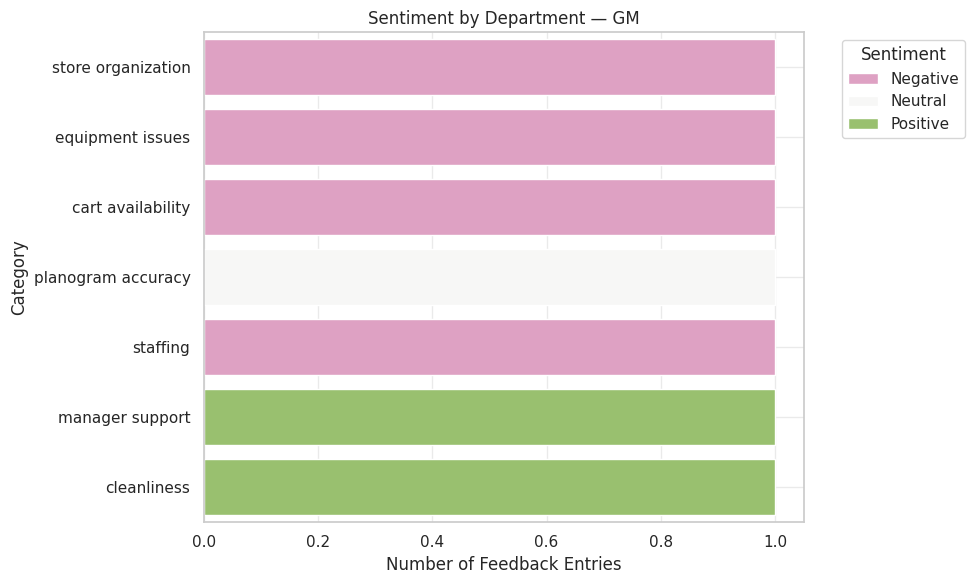

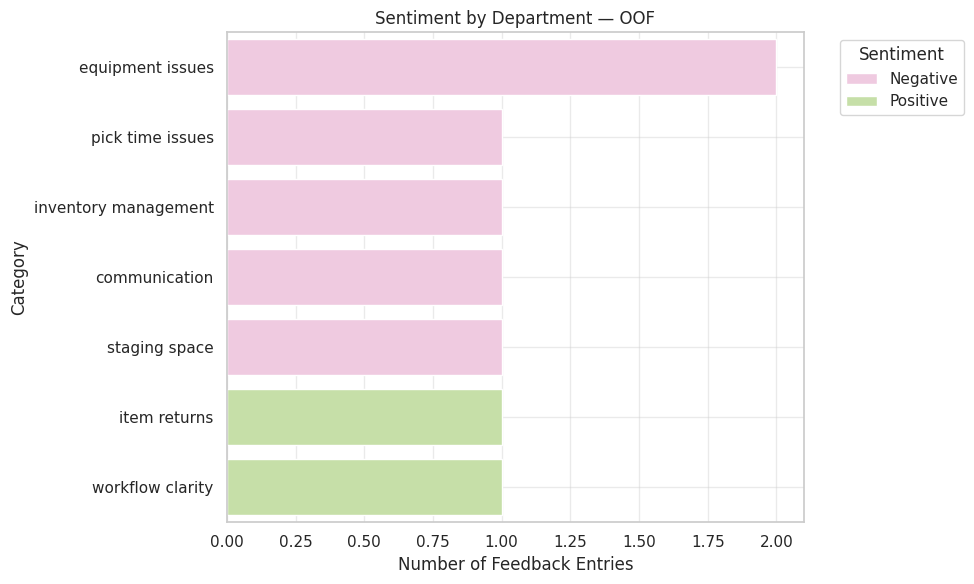

In [78]:
def department_insight_agent(department, department_df):
    """
    Generate a rich, constructive weekly insight summary for the given department using categorized feedback and sentiment.
    """

    system_prompt = f"""
You are a workplace assistant generating a weekly feedback summary for the '{department}' department.

Analyze the categorized and sentiment-tagged feedback provided and write an insightful summary that:
1. Identifies the most common issues and what employees are specifically saying.
2. Explains how these issues are affecting daily work or morale.
3. Mentions categories with positive sentiment and what’s working well.
4. Uses a constructive tone to encourage improvement without being overly negative.
5. Includes both pain points and positive highlights when present.

Output your results strictly in this JSON format:
{{
  "department": "{department}",
  "summary": "Write a 3–5 sentence paragraph summarizing key issues and positive trends, explaining their impact when possible.",
  "notable_categories": ["most common issue", "second most common issue", "optional: most common positive"],
  "overall_sentiment": "Negative | Neutral | Positive"
}}
"""


    # Prepare the feedback strings
    combined_feedback = "\n".join(
        f"- ({row['category']}, {row['sentiment']}) {row['summary']}"
        for _, row in department_df.iterrows()
    )

    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": f"Here is the feedback for this department:\n\n{combined_feedback}"}
    ]

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        temperature=0.7,  # was 0.3 — now more expressive
    )

    reply = response.choices[0].message.content.strip()

    try:
        return json.loads(reply)
    except json.JSONDecodeError:
        print(f"❌ Could not parse response for department: {department}")
        return {
            "department": department,
            "summary": "Could not generate insight.",
            "notable_categories": [],
            "overall_sentiment": "Neutral"
        }

department_reports = []

for dept in df["department"].unique():
    dept_df = df[df["department"] == dept]
    print(f"\n📊 Generating summary for department: {dept}")
    report = department_insight_agent(dept, dept_df)
    department_reports.append(report)

# Preview results
insight_df = pd.DataFrame(department_reports)
# insight_df

for _, row in insight_df.iterrows():
    print("\n" + "=" * 72)
    print(f"🏬 Department:\n{row['department']}\n")

    # Wrap long summary text
    import textwrap
    wrapped_summary = textwrap.fill(row['summary'], width=70)
    print("📝 Summary:\n" + wrapped_summary + "\n")

    print("📌 Notable Categories:")
    for category in row["notable_categories"]:
        print(f"   • {category}")

    print(f"\n📊 Overall Sentiment:\n{row['overall_sentiment']}")
    print("=" * 72)


for dept in df["department"].unique():
    dept_df = df[df["department"] == dept]

    plt.figure(figsize=(10, 6))
    sns.countplot(
        data=dept_df,
        y="category",
        hue="sentiment", palette="PiYG",
        order=dept_df["category"].value_counts().index,  # most‐mentioned at top
    )
    plt.title(f"Sentiment by Department — {dept}")
    plt.xlabel("Number of Feedback Entries")
    plt.ylabel("Category")
    plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1.0), loc="best")
    plt.grid(alpha=0.4)  # 👈 sets gridline transparency
    plt.tight_layout()
    plt.show()

This is exactly the effect we were aiming for — a **constructive tone** that respectfully acknowledges real issues without sounding defeatist. What you now have is a **well-balanced reporting agent** that can be shared with management and teams to:

* ✅ Highlight pain points clearly and empathetically
* ✅ Reinforce what’s working well to sustain morale
* ✅ Provide a foundation for discussion and action

### Next Steps You Might Consider:

If you're ready to keep building, here are a few directions you could explore:

---

#### 📤 1. **Automated Weekly Email Delivery**

* Format these summaries into a markdown or HTML email
* Use the insight summaries + bar plots
* Send to relevant department heads using a scheduling tool (e.g., `smtplib`, Gmail + Zapier, or `n8n`)

---

#### 📊 2. **Streamlit Dashboard**

* Show:

  * Category × Sentiment charts
  * Department summaries in collapsible sections
  * File upload (e.g., CSV feedback ingestion)
* Bonus: Let managers filter by time range or category

---

#### 🧠 3. **Suggestion Agent (Optional)**

* Based on repeated negative sentiment in one category (e.g., “equipment issues”), generate suggested actions
* Could be added to the summary email like:

  > 💡 Suggested Next Step: Review scanner model failures in OOF and evaluate upgrade.




In [80]:
import textwrap

def draft_manager_email(department_reports, manager_name="Store Manager", sender_name="Micah Shull", sender_title="Data Scientist"):
    system_prompt = f"""
You are an assistant generating a weekly summary email for a store manager named {manager_name}.

You will receive a structured list of department summaries that includes:
- Department name
- Summary of employee feedback
- Notable categories
- Overall sentiment

Your email should:
- Open with a brief professional greeting
- For each department:
  • Provide the summary
  • Mention the key categories
  • Note the overall sentiment
- End with a brief positive closing
- Keep the tone constructive and morale-friendly
- Format the email in plain text using line breaks (no markdown)

Sign the email from {sender_name}, {sender_title}.
"""

    # Compose the body content from department summaries
    content = ""
    for report in department_reports:
        content += (
            f"Department: {report['department']}\n"
            f"Summary: {report['summary']}\n"
            f"Notable Categories: {', '.join(report['notable_categories'])}\n"
            f"Overall Sentiment: {report['overall_sentiment']}\n\n"
        )

    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": f"Here is the department feedback summary:\n\n{content}"}
    ]

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        temperature=0.5  # increased slightly for a friendlier tone
    )

    return response.choices[0].message.content.strip()

# 🔁 Generate the email from your current insight data
email_text = draft_manager_email(
    department_reports,
    manager_name="Brandon",  # change as needed
    sender_name="Micah Shull",
    sender_title="Data Scientist"
)

# 📬 Print formatted email output
print("\n📬 Weekly Feedback Summary Email\n" + "=" * 72)

wrapped_email = textwrap.fill(email_text, width=72, replace_whitespace=False)

# This preserves paragraph breaks while wrapping long lines
for paragraph in email_text.split("\n\n"):
    print(textwrap.fill(paragraph.strip(), width=72))
    print()



📬 Weekly Feedback Summary Email
Subject: Weekly Department Feedback Summary

Hi Brandon,

I hope this message finds you well. Below is the summary of employee
feedback from our departments for this week:

**GM Department:** This week, the GM department has highlighted several
challenges impacting daily operations and employee morale, particularly
concerning store organization, equipment issues, and staffing. Employees
noted that messy aisles, frequent breakdowns of equipment, and a
shortage of shopping carts during busy times create significant
obstacles. However, there are positive aspects as well, such as strong
support from management during peak periods and effective organization
of endcaps, which indicate that teamwork and planning can lead to
successful outcomes.  Key categories include store organization,
equipment issues, and manager support.  Overall sentiment for this
department is negative.

**OOF Department:** This week, the OOF department is facing significant
challenges,